# SANJOG MOHANTY

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [29]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
df.shape   # no. of row and no. of columns

(181691, 135)

In [33]:
x=df.isnull().sum()/df.shape[0]*100

In [34]:
null_val=x[x>30]

In [35]:
null_val

approxdate     94.914993
resolution     98.778145
location       69.456385
summary        36.396409
alternative    84.032781
                 ...    
addnotes       84.430159
scite1         36.430533
scite2         57.657231
scite3         76.049447
related        86.219461
Length: 87, dtype: float64

In [36]:
null_column_name=list(null_val.index)

In [37]:
df_Terrorism=df.drop(null_column_name,axis=1)

In [38]:
df_Terrorism.shape    # after removing null column values we have 48 columns left and 181691 row

(181691, 48)

In [39]:
df_Terrorism.head(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1


In [40]:
print("Country with the most attack: ",df_Terrorism['country_txt'].value_counts().idxmax())
print('City with most attack: ',df_Terrorism['city'].value_counts().index[1])
print('Region with most attack:',df_Terrorism['region_txt'].value_counts().idxmax())
print('Year with most attack: ',df_Terrorism['iyear'].value_counts().idxmax())
print('Month with most attack: ',df_Terrorism['imonth'].value_counts().idxmax())
print('Group with most attack :',df_Terrorism['gname'].value_counts().index[1])
print('Most attack type: ',df_Terrorism['attacktype1_txt'].value_counts().idxmax())

Country with the most attack:  Iraq
City with most attack:  Baghdad
Region with most attack: Middle East & North Africa
Year with most attack:  2014
Month with most attack:  5
Group with most attack : Taliban
Most attack type:  Bombing/Explosion


In [44]:
df_Terrorism['country_txt'].value_counts().idxmax()

'Iraq'

In [46]:
df_Terrorism['imonth'].value_counts().idxmax()

5

In [47]:
df_Terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [15]:
df_Terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [48]:
# keep 20 columns
df_Terrorism=df[['eventid', 'iyear', 'country_txt', 'region_txt', 'provstate', 'city', 'crit1',
       'crit2', 'crit3', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'claimed',
       'weaptype1_txt', 'nkill', 'nwound']]

In [51]:
df_Terrorism.columns


Index(['eventid', 'iyear', 'country_txt', 'region_txt', 'provstate', 'city',
       'crit1', 'crit2', 'crit3', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'natlty1_txt', 'gname', 'guncertain1', 'claimed',
       'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

<AxesSubplot:xlabel='success', ylabel='count'>

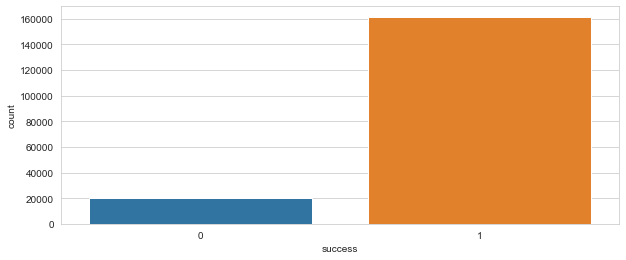

In [52]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.countplot('success',data=df_Terrorism)

In [53]:
df_Terrorism.head(3)

,eventid,iyear,country_txt,region_txt,provstate,city,crit1,crit2,crit3,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,guncertain1,claimed,weaptype1_txt,nkill,nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0


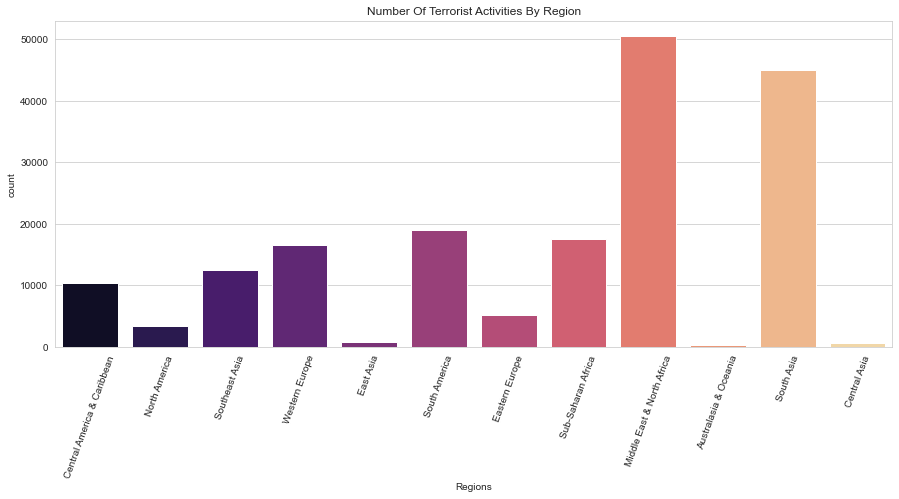

In [57]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df_Terrorism,palette='magma')
plt.xticks(rotation=70)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

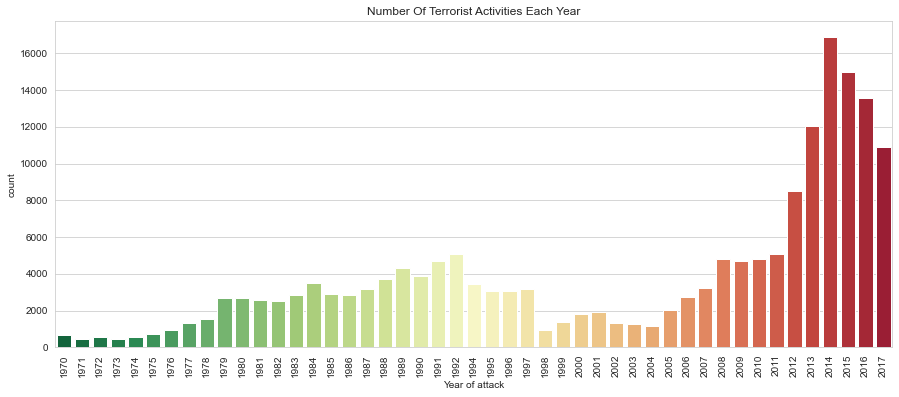

In [58]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df_Terrorism,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

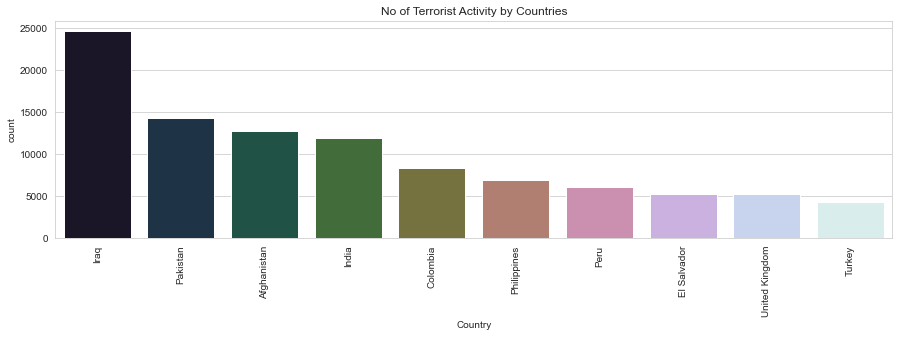

In [59]:
plt.subplots(figsize=(15,4))
sns.countplot('country_txt',data=df_Terrorism,palette='cubehelix',order=df_Terrorism['country_txt'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('No of Terrorist Activity by Countries')
plt.show()

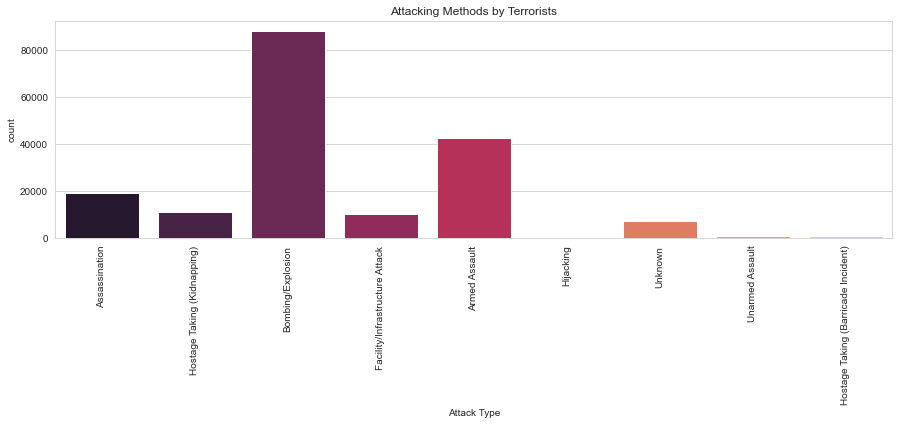

In [60]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype1_txt',data=df_Terrorism,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

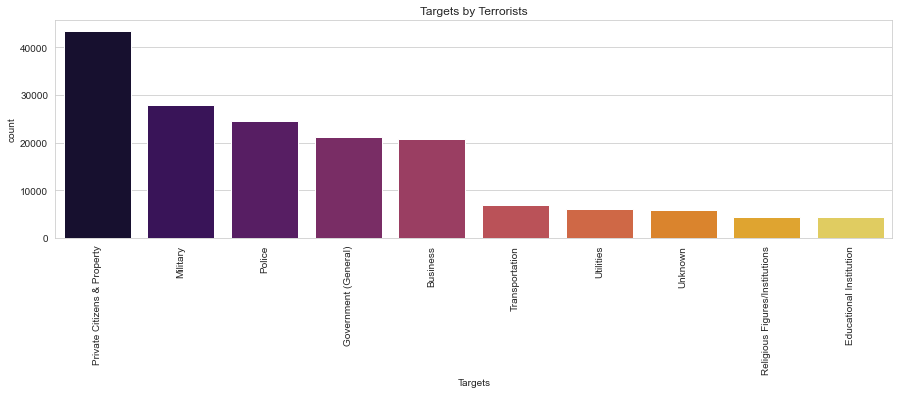

In [61]:
plt.subplots(figsize=(15,4))
sns.countplot('targtype1_txt',data=df_Terrorism,palette='inferno',order=df_Terrorism['targtype1_txt'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.xlabel('Targets')
plt.title('Targets by Terrorists')
plt.show()

([<matplotlib.patches.Wedge at 0xb0ca6251d0>,
 [Text(-0.32863232792216945, -1.0497622554866677, 'Bombing/Explosion'),
  Text(1.0711387534252348, 0.2503233327331559, 'Armed Assault'),
  Text(0.19913292844960218, 1.081825344871845, 'Assassination'),
  Text(-0.48024529771664487, 0.9896284424070739, 'Hostage Taking (Kidnapping)'),
  Text(-0.9398614328300401, 0.5715422006104747, 'Facility/Infrastructure Attack'),
  Text(-1.07746044771921, 0.22153777014477685, 'Unknown'),
  Text(-1.0961887615023163, 0.09148879251590365, 'Unarmed Assault'),
  Text(-1.099358730045444, 0.03755506188077448, 'Hostage Taking (Barricade Incident)'),
  Text(-1.0999298348869355, 0.012424102607376829, 'Hijacking')])

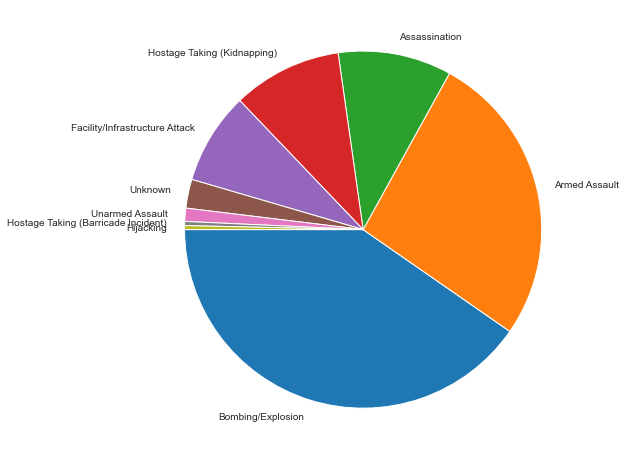

In [24]:
plt.figure(figsize=(8,19))
#df_Terrorism[df_Terrorism['country_txt'] == 'India']['attacktype1_txt'].value_counts().plot(kind='pie')
plt.pie(df_Terrorism[df_Terrorism['country_txt'] == 'India']['attacktype1_txt'].value_counts(ascending=False),
        labels=df_Terrorism[df_Terrorism['country_txt'] == 'India']['attacktype1_txt'].value_counts().index,startangle = 180)

In [63]:
df['casualties']=df['nkill']+df['nwound']

In [64]:
df['casualties']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: casualties, Length: 181691, dtype: float64

In [65]:
x=df.groupby(['region_txt', 'iyear'])['casualties'].count().reset_index()

In [68]:
x[:25]

,region_txt,iyear,casualties
0,Australasia & Oceania,1970,1
1,Australasia & Oceania,1971,1
2,Australasia & Oceania,1972,8
3,Australasia & Oceania,1973,1
4,Australasia & Oceania,1974,1
5,Australasia & Oceania,1978,2
6,Australasia & Oceania,1979,2
7,Australasia & Oceania,1980,5
8,Australasia & Oceania,1981,3
9,Australasia & Oceania,1982,1
